<a href="https://colab.research.google.com/github/armando-lv/csv_storage/blob/main/Miner%C3%ADa%20Proyecto%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy as dc
import seaborn as sns
from matplotlib import pyplot as plt

### Cargar, juntar y limpiar bases de datos

In [2]:
tsales = pd.read_csv("https://raw.githubusercontent.com/armando-lv/csv_storage/main/telesales_clean.csv", index_col=None)
hcount = pd.read_csv("https://raw.githubusercontent.com/armando-lv/csv_storage/main/Telesales%20HC.csv", index_col=None)
tsales = tsales.iloc[:108] # Nos deshacemos de la ultima fila ya que le faltan varios valores
tsales["Headcount"] = hcount.iloc[:108, 2] # Agregamos el headcount a nuestro dataframe principal
# ¿Qué variables necesitaremos?
# Index, Week, Salary, Bonus, P.A., Other, OT, Volume IB, Actual AHT, Actual % SHR, Actual ABN Calls, Attrition ACT,
# Calls per Hour, Workload, Productive Hrs, Headcount
# Las demás variables agregan ruido o se calculan directamente de otras variables
# Esto nos deja con 14 variables y un identificador para la semana
tsales = tsales[['Week', 'a. Salary', 'b. Bonus', 'c. P.A.', 'd. Other', 'e. OT', 
                 'Volume IB', 'Actual AHT', 'Actual % SHR', 'Actual ABN calls', 'Attrition ACT',
                 'Calls per Hour', 'Workload', 'Productive Hrs', 'Headcount']]
tsales.columns = ['Week', 'Salary', 'Bonus', 'P.A.', 'Other', 'OT', 
                 'Volume IB', 'Actual AHT', 'Actual % SHR', 'Actual ABN calls', 'Attrition ACT',
                 'Calls per Hour', 'Workload', 'Productive Hrs', 'Headcount'] # Cambiamos los nombres de las columnas para facilitar su manejo
tsales["Week"] = pd.to_datetime(tsales["Week"]) # Cambiamos el tipo de dato de nuestra semana a fechatsales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Análisis exploratorio

In [3]:
round(tsales.describe(), 2) # Medidas estadísticas de nuestro conjunto
# Conteo, promedio, desviación, mínimo, percentil 25, percentil 50, percentil 75 y máximo

,Salary,Bonus,P.A.,Other,OT,Volume IB,Actual AHT,Actual % SHR,Actual ABN calls,Attrition ACT,Calls per Hour,Workload,Productive Hrs,Headcount
count,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00
mean,13035.06,24349.63,1779.84,1882.24,41.76,71676.49,182.68,23.11,1792.40,1.48,16.34,3487.86,4483.30,156.21
std,2434.54,8039.56,420.78,2879.00,98.05,15593.11,34.04,13.49,1582.78,1.72,7.37,872.95,1040.51,32.75
min,8153.00,256.00,1160.00,232.00,0.00,27658.00,130.00,10.00,94.00,0.00,8.10,780.00,125.00,111.00
25%,11256.00,21036.50,1522.00,295.50,0.00,64827.00,157.00,16.05,699.75,0.00,13.60,2923.75,4045.25,124.00
50%,12824.50,25381.50,1718.00,2208.50,0.00,72088.50,183.00,19.45,1186.00,1.00,14.80,3368.00,4658.50,149.50
75%,14259.50,29834.50,1863.50,3040.00,42.75,82868.50,201.00,24.02,2693.50,2.00,16.88,4082.25,5056.75,186.25
max,18618.00,37661.00,3605.00,28037.00,767.00,105739.00,403.00,101.30,7384.00,11.00,70.50,5929.00,6299.00,227.00


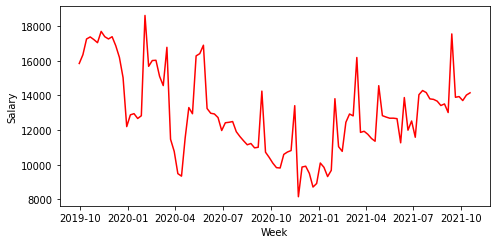

In [4]:
# Nos enfocaremos en observar nuestros indicadores
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x="Week", y="Salary", data=tsales, color="red")

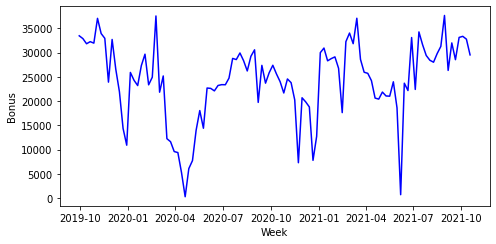

In [5]:
sns.lineplot(x="Week", y="Bonus", data=tsales, color="blue")

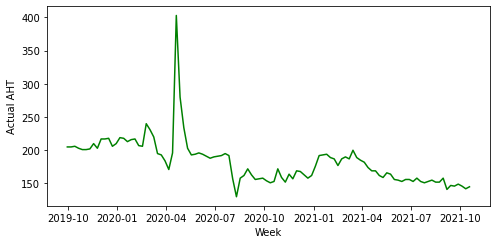

In [6]:
sns.lineplot(x="Week", y="Actual AHT", data=tsales, color="green")

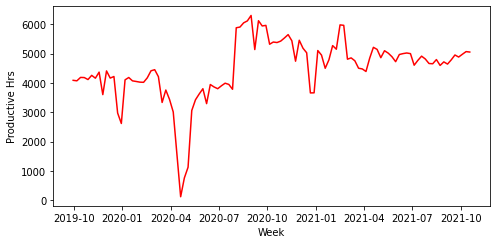

In [7]:
sns.lineplot(x="Week", y="Productive Hrs", data=tsales, color="red")

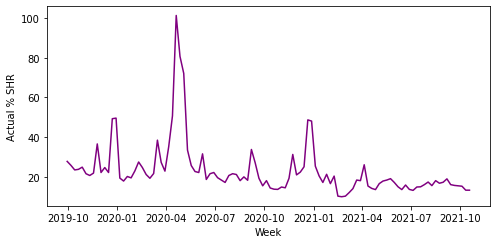

In [11]:
sns.lineplot(x="Week", y="Actual % SHR", data=tsales, color="purple")

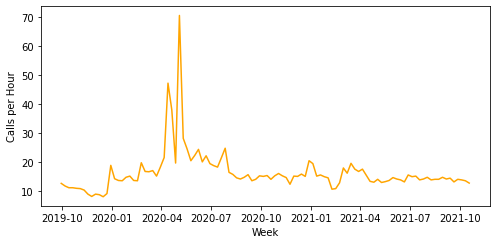

In [12]:
sns.lineplot(x="Week", y="Calls per Hour", data=tsales, color="orange")

#### Correlaciones en el conjunto de datos

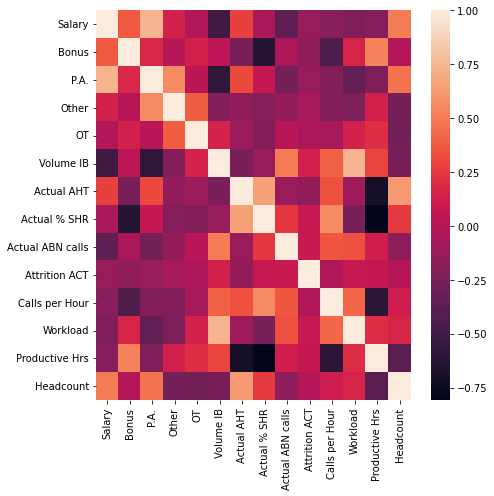

In [15]:
# Revisaremos las correlaciones que existen en el conjunto de datos
plt.rcParams["figure.figsize"] = [7.00, 7.00]
sns.heatmap(tsales.corr())

### Regresión RandomForest con selección de variables

In [23]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import RFECV as RFECV

In [21]:
tsales.columns # Estas son las variables que escogimos en el principio y a continuación usaremos RFECV,
               # una herramienta de scikit learn que escoge las variables de mayor importancia
               # con ayuda de cross validation y un estimador. 

Index(['Week', 'Salary', 'Bonus', 'P.A.', 'Other', 'OT', 'Volume IB',
       'Actual AHT', 'Actual % SHR', 'Actual ABN calls', 'Attrition ACT',
       'Calls per Hour', 'Workload', 'Productive Hrs', 'Headcount'],
      dtype='object')

In [69]:
# 1. Seleccionaremos las mejores variables para cada indicador
# 2. Usaremos Random Forest para predecir el comportamiento de cada uno
# 3. Obtendremos los valores de importancia para cada uno, con el fin de saber cuáles afectan a cada indicador más

#### Salary

In [ ]:
del tsales["Week"] # Nos deshacemos de la semana, ya que no es conveniente implementarla a un regresor

In [130]:
indicators = ["Salary", "Bonus", "Actual AHT", "Actual % SHR", "Calls per Hour"]
dict_importances = {} # Aquí guardaremos los valores de importancia
dict_y_preds = {} # Aquí guardaremos los valores para los indicadores que pregida el regresor

for ind in indicators:
  print(ind)
  x = tsales[tsales.columns[tsales.columns != ind]]
  y = tsales[ind]
  x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, shuffle = False)

  sel_forest = rfr(random_state=42)
  selector = RFECV(sel_forest)
  selector.fit(x_train, y_train)
  selected_vars = list(x.columns[selector.support_])
  non_selected_vars = list(x.columns[~selector.support_])

  x_train_sel = x_train[selected_vars]
  forest = rfr(random_state=42)
  forest.fit(x_train_sel, y_train)

  tsales_sel = tsales[selected_vars]
  tsales_pred = forest.predict(tsales_sel)
  importance = pd.DataFrame({"Variable" : selected_vars, "Valor Importancia" : forest.feature_importances_})
  dict_importances[ind] = dc(importance)

  y_tsales_pred = forest.predict(tsales_sel)
  dict_y_preds[ind] = dc(y_tsales_pred)

Salary
Bonus
Actual AHT
Actual % SHR
Calls per Hour


### Interacción de las variables, para hacer recomendaciones

In [ ]:
# Ya que tenemos nuestras predicciones y nuestras importancias, podemos realizar recomendaciones

    Variable  Valor Importancia
0       P.A.           0.795391
1      Other           0.073985
2  Volume IB           0.060432
3  Headcount           0.070191


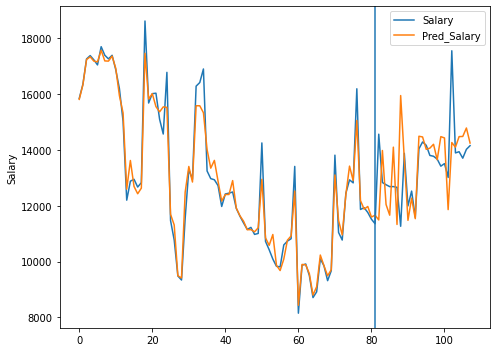

In [131]:
# Salary
print(dict_importances["Salary"])

plt.rcParams["figure.figsize"] = [7.00, 5.00]
sns.lineplot(x = [i for i in range(len(tsales))], y = tsales["Salary"])
sns.lineplot(x = [i for i in range(len(tsales))], y = dict_y_preds["Salary"])
plt.axvline(len(x_train), 0, 1)
plt.legend(labels=["Salary", "Pred_Salary"])

           Variable  Valor Importancia
0            Salary           0.034790
1              P.A.           0.036370
2             Other           0.176811
3         Volume IB           0.025632
4        Actual AHT           0.013382
5      Actual % SHR           0.188330
6  Actual ABN calls           0.027008
7          Workload           0.026997
8    Productive Hrs           0.426488
9         Headcount           0.044194


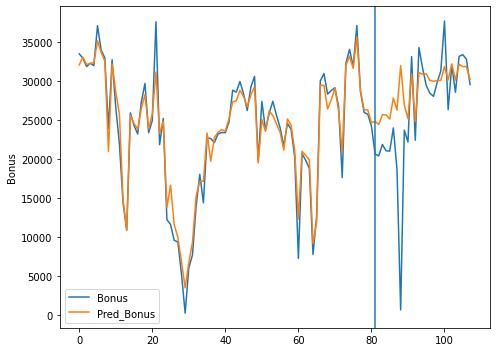

In [132]:
# Bonus
print(dict_importances["Bonus"])

plt.rcParams["figure.figsize"] = [7.00, 5.00]
sns.lineplot(x = [i for i in range(len(tsales))], y = tsales["Bonus"])
sns.lineplot(x = [i for i in range(len(tsales))], y = dict_y_preds["Bonus"])
plt.axvline(len(x_train), 0, 1)
plt.legend(labels=["Bonus", "Pred_Bonus"])

         Variable  Valor Importancia
0          Salary           0.039100
1           Bonus           0.082889
2            P.A.           0.050599
3           Other           0.315831
4       Volume IB           0.035439
5    Actual % SHR           0.061019
6        Workload           0.144792
7  Productive Hrs           0.181491
8       Headcount           0.088840


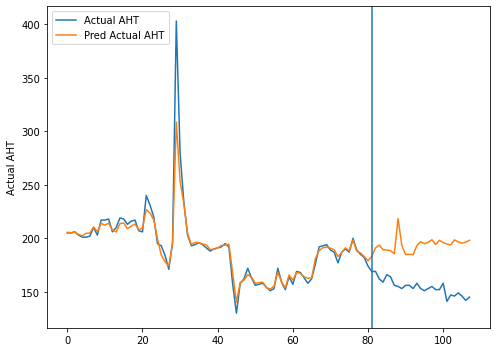

In [133]:
# Actual AHT
print(dict_importances["Actual AHT"])

plt.rcParams["figure.figsize"] = [7.00, 5.00]
sns.lineplot(x = [i for i in range(len(tsales))], y = tsales["Actual AHT"])
sns.lineplot(x = [i for i in range(len(tsales))], y = dict_y_preds["Actual AHT"])
plt.axvline(len(x_train), 0, 1)
plt.legend(labels=["Actual AHT", "Pred Actual AHT"])

            Variable  Valor Importancia
0             Salary           0.022793
1              Bonus           0.208483
2              Other           0.019761
3                 OT           0.020725
4         Actual AHT           0.069827
5   Actual ABN calls           0.027981
6      Attrition ACT           0.015427
7     Calls per Hour           0.030584
8           Workload           0.077813
9     Productive Hrs           0.483972
10         Headcount           0.022636


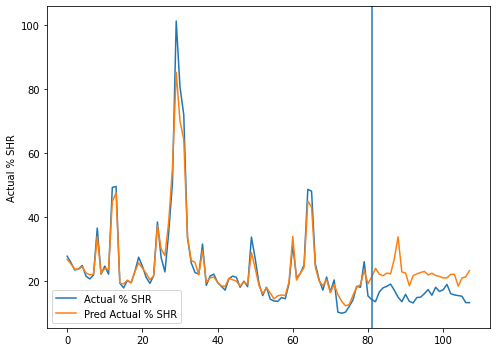

In [134]:
# Actual % SHR
print(dict_importances["Actual % SHR"])

plt.rcParams["figure.figsize"] = [7.00, 5.00]
sns.lineplot(x = [i for i in range(len(tsales))], y = tsales["Actual % SHR"])
sns.lineplot(x = [i for i in range(len(tsales))], y = dict_y_preds["Actual % SHR"])
plt.axvline(len(x_train), 0, 1)
plt.legend(labels=["Actual % SHR", "Pred Actual % SHR"])

           Variable  Valor Importancia
0             Bonus           0.222285
1         Volume IB           0.093874
2      Actual % SHR           0.101634
3  Actual ABN calls           0.135580
4          Workload           0.172858
5    Productive Hrs           0.273769


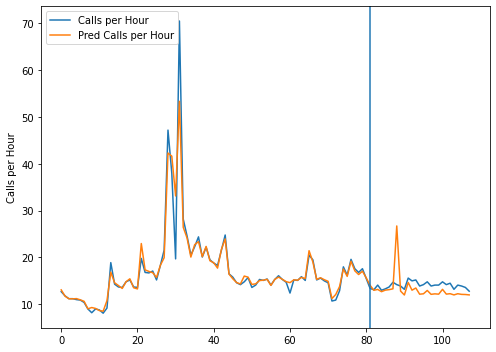

In [135]:
# Calls per Hour
print(dict_importances["Calls per Hour"])

plt.rcParams["figure.figsize"] = [7.00, 5.00]
sns.lineplot(x = [i for i in range(len(tsales))], y = tsales["Calls per Hour"])
sns.lineplot(x = [i for i in range(len(tsales))], y = dict_y_preds["Calls per Hour"])
plt.axvline(len(x_train), 0, 1)
plt.legend(labels=["Calls per Hour", "Pred Calls per Hour"])